In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_excel('global_laptop_selling_data.xlsx')
    

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


# Data Analysis

In [4]:
df.dtypes

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

In [5]:
df.shape

(1303, 13)

In [6]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [7]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [9]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [10]:
df.corr(numeric_only = True)

,laptop_ID,Inches,Price_euros
laptop_ID,1.000000,-0.087796,0.067830
Inches,-0.087796,1.000000,0.068197
Price_euros,0.067830,0.068197,1.000000


In [11]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  106
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [12]:
df1= df.copy()
df2= df.copy()

In [13]:
df.duplicated().sum()

0

# Scalling

In [14]:
from sklearn.preprocessing import MinMaxScaler


In [15]:
mn = MinMaxScaler(feature_range=(0,1))

In [16]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [17]:
df['laptop_ID'] = mn.fit_transform(df[['laptop_ID']])
df['Inches'] = mn.fit_transform(df[['Inches']])
df['Price_euros'] = mn.fit_transform(df[['Price_euros']])

In [18]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,0.000000,Apple,MacBook Pro,Ultrabook,0.385542,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,0.196741
1,0.000758,Apple,Macbook Air,Ultrabook,0.385542,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,0.122353
2,0.001516,HP,250 G6,Notebook,0.662651,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,0.067679
3,0.002274,Apple,MacBook Pro,Ultrabook,0.638554,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,0.398895
4,0.003033,Apple,MacBook Pro,Ultrabook,0.385542,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,0.275038


# Visualization

In [19]:
import seaborn as sns

<Axes: xlabel='Price_euros', ylabel='Count'>

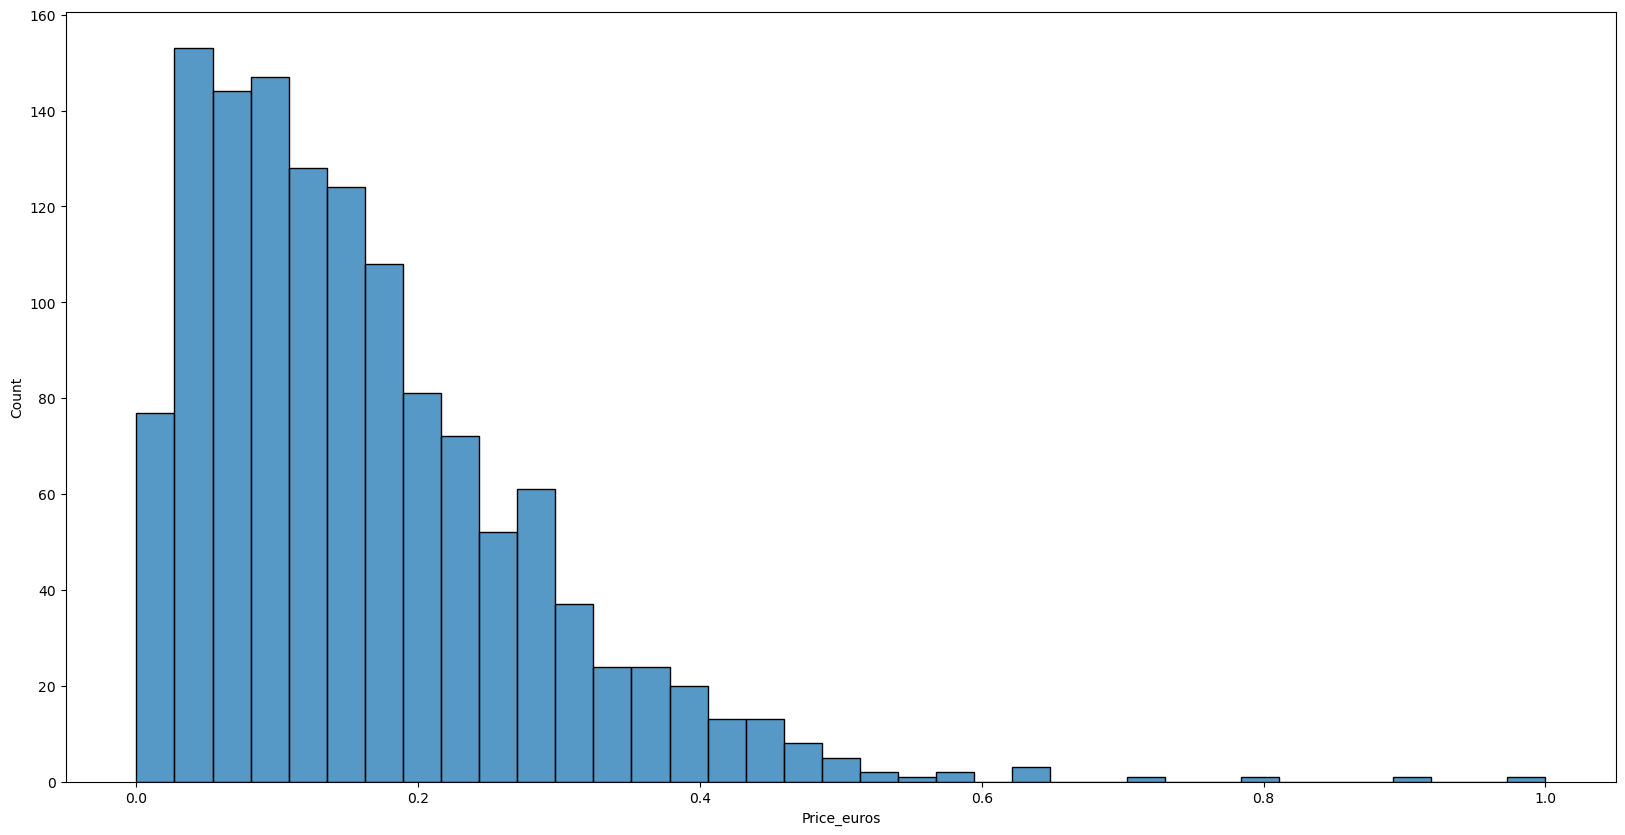

In [20]:
plt.figure(figsize = (20, 10))
sns.histplot(df['Price_euros'])

<Axes: xlabel='Inches', ylabel='Count'>

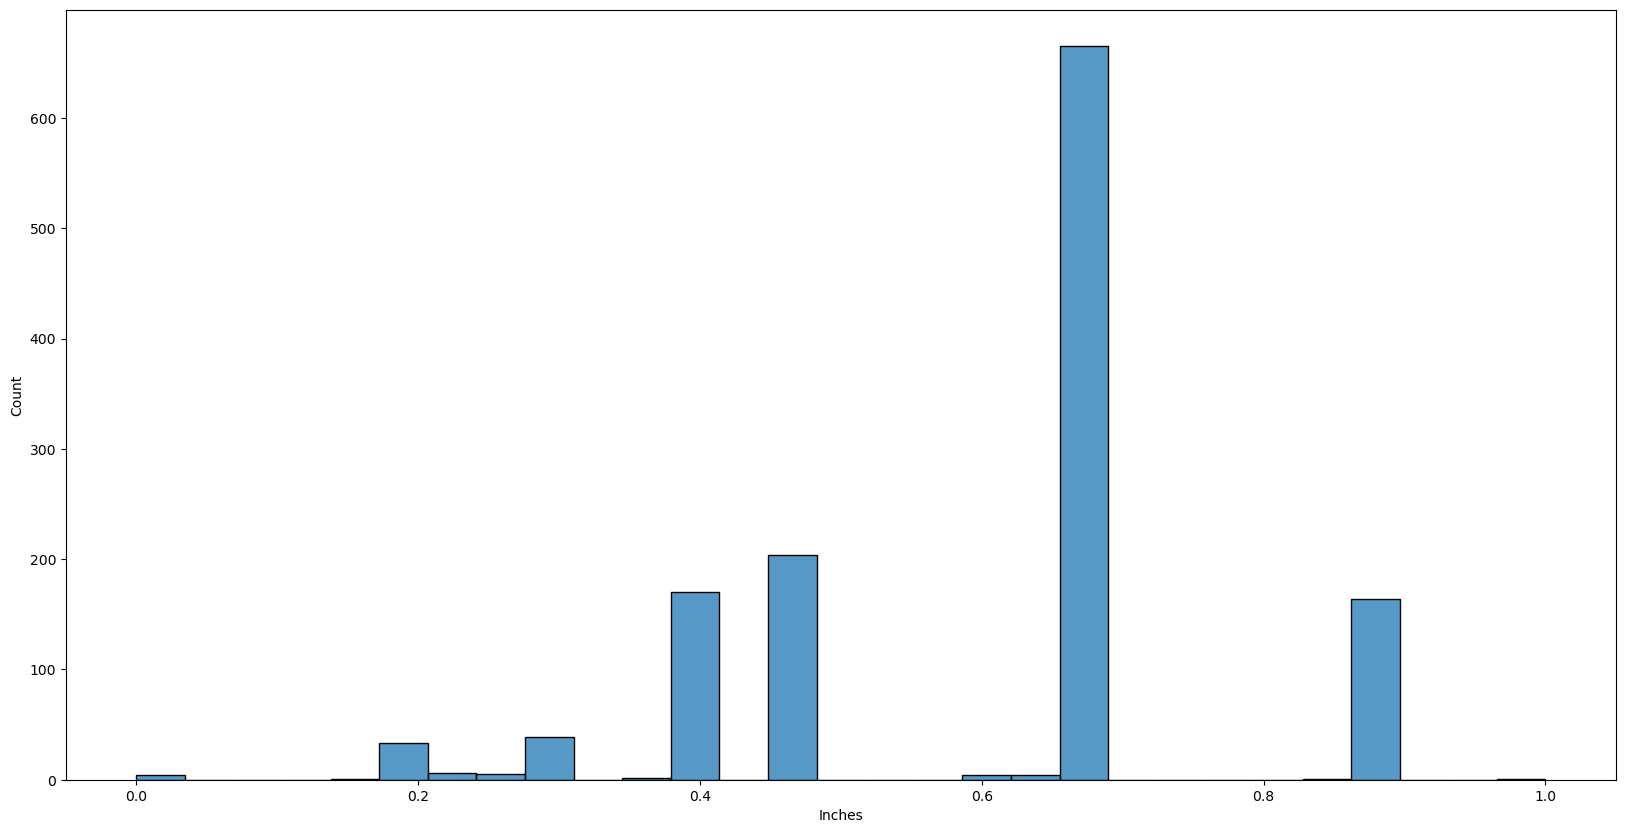

In [21]:
plt.figure(figsize = (20, 10))
sns.histplot(df['Inches'])

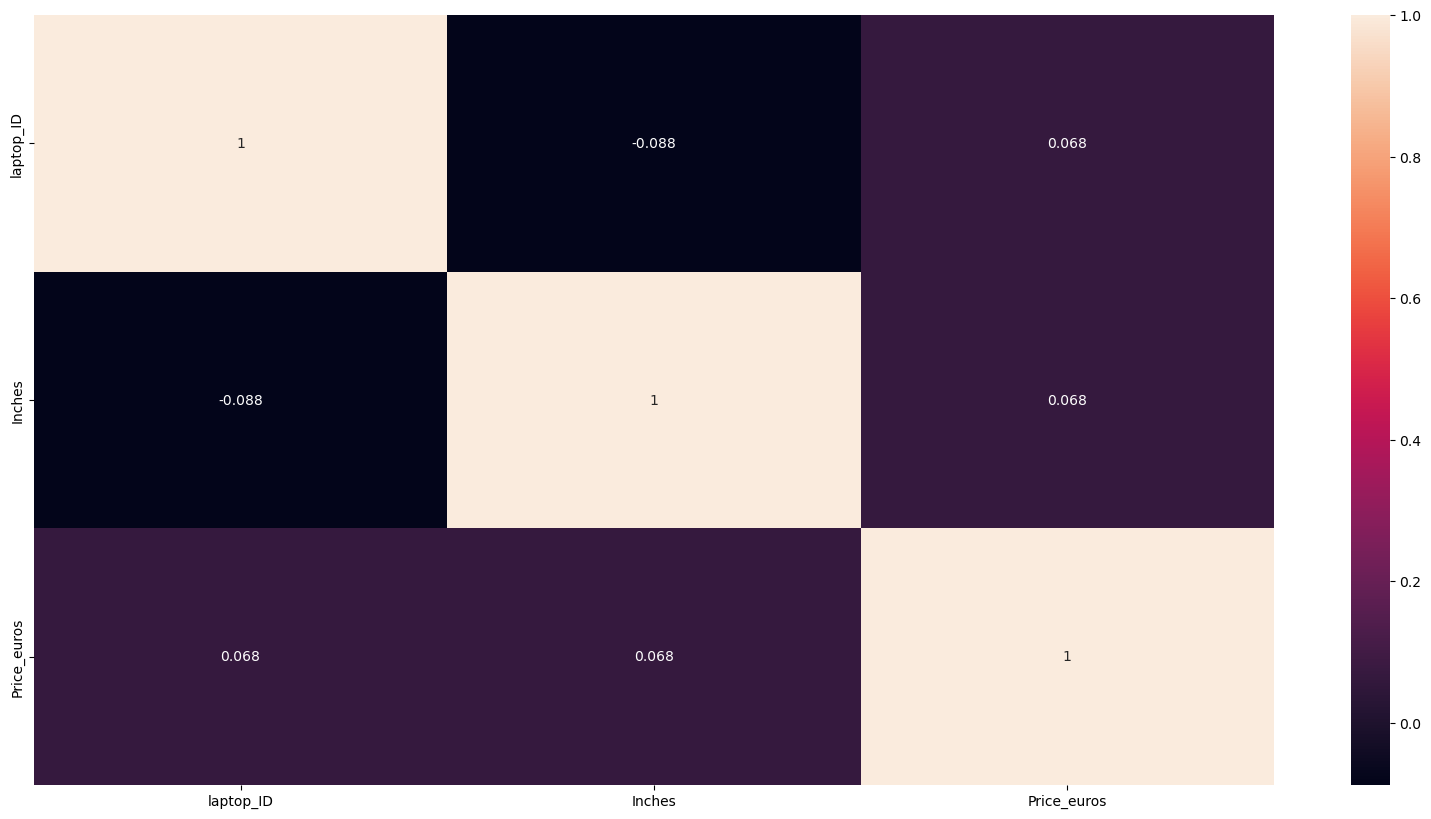

<Figure size 640x480 with 0 Axes>

In [22]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(numeric_only = True), annot= True)
plt.show()
plt.savefig("test.png")

# Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype

In [24]:
le = LabelEncoder()

In [25]:
for col in df.columns:
    if is_numeric_dtype(df[col]):
        continue
    else:
        df[col] = le.fit_transform(df[col])
        
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,0.000000,1,300,4,0.385542,23,65,8,4,56,8,38,0.196741
1,0.000758,1,301,4,0.385542,1,63,8,2,50,8,35,0.122353
2,0.001516,7,50,3,0.662651,8,74,8,16,52,4,74,0.067679
3,0.002274,1,300,4,0.638554,25,85,1,29,8,8,71,0.398895
4,0.003033,1,300,4,0.385542,23,67,8,16,57,8,38,0.275038


In [26]:
df.drop(['laptop_ID'], axis = 1, inplace = True)
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,300,4,0.385542,23,65,8,4,56,8,38,0.196741
1,1,301,4,0.385542,1,63,8,2,50,8,35,0.122353
2,7,50,3,0.662651,8,74,8,16,52,4,74,0.067679
3,1,300,4,0.638554,25,85,1,29,8,8,71,0.398895
4,1,300,4,0.385542,23,67,8,16,57,8,38,0.275038


# Seaprating x,y

In [27]:
df.rename(columns={'Price_euros': 'Price'}, inplace=True)

In [28]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,1,300,4,0.385542,23,65,8,4,56,8,38,0.196741
1,1,301,4,0.385542,1,63,8,2,50,8,35,0.122353
2,7,50,3,0.662651,8,74,8,16,52,4,74,0.067679
3,1,300,4,0.638554,25,85,1,29,8,8,71,0.398895
4,1,300,4,0.385542,23,67,8,16,57,8,38,0.275038


In [29]:
x = df.drop(['Price'], axis = 1)
y = df['Price']

In [30]:
xtrain, xtest, ytrain, ytest = tts(x, y, test_size = 0.3, random_state = 44)

In [31]:
xtrain.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
478,4,240,3,0.662651,8,83,8,10,5,5,113
1066,2,380,1,0.867470,15,93,6,12,88,5,161
562,7,108,4,0.385542,19,47,1,29,45,5,17
503,10,205,3,0.469880,0,37,5,26,42,5,105
266,2,600,0,0.385542,7,106,8,34,59,5,21


In [32]:
xtrain.shape

(912, 11)

# Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lin = LinearRegression()

In [35]:
lin.fit(xtrain, ytrain)

LinearRegression()

In [36]:
lin_pred = lin.predict(xtest)
lin_pred

array([ 0.25832735,  0.12698886,  0.16884922,  0.13372428,  0.12099091,
        0.15925135,  0.08658183,  0.16291579,  0.25122307,  0.14743007,
        0.04792053,  0.19535254,  0.06644151,  0.13209523,  0.27609148,
        0.24844947,  0.14609015,  0.14730428,  0.17918481,  0.27614383,
        0.15646903,  0.27715727,  0.12945901,  0.14820134,  0.20469176,
       -0.00939589,  0.13189952,  0.23251095,  0.14803034,  0.35323483,
        0.07406606,  0.12342934,  0.13970558,  0.24332996,  0.25873672,
        0.27103034,  0.09403649,  0.18590992,  0.13408521,  0.28524125,
        0.26485815,  0.16854331,  0.11757285,  0.08368308,  0.12657333,
        0.11812515,  0.2054075 ,  0.15319518,  0.23793428,  0.13927617,
        0.11599607,  0.12296931,  0.17968936,  0.10164121,  0.26238239,
        0.34442463,  0.01580181,  0.14063187,  0.21191487,  0.1689629 ,
        0.18005844,  0.21445142,  0.06781108,  0.19678863,  0.17713988,
        0.15647614,  0.12294855,  0.02791842,  0.01551084,  0.14

In [37]:
lin_score = lin.score(xtest,ytest)
lin_score

0.4493283944176585

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype

In [39]:
lin_mse = mean_squared_error(ytest, lin_pred)
lin_mse

0.008622040348055995

In [40]:
lin_mae = mean_absolute_error(ytest, lin_pred)
lin_mae

0.06505354504125853

# Decision tree

In [41]:
de = DecisionTreeRegressor()

In [42]:
de.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [43]:
de_pred = de.predict(xtest)
de_pred

array([0.44303797, 0.09367089, 0.20084388, 0.1571308 , 0.07139241,
       0.24556962, 0.10565401, 0.14409114, 0.19679325, 0.15443038,
       0.25670886, 0.18869198, 0.04979072, 0.12067511, 0.37890295,
       0.51746835, 0.10886076, 0.11578059, 0.17130802, 0.32489451,
       0.24911392, 0.26582278, 0.22362869, 0.21910549, 0.09220591,
       0.03797468, 0.06801688, 0.14092827, 0.02548523, 0.52742616,
       0.04979072, 0.13924051, 0.20303797, 0.28742616, 0.39240506,
       0.28962025, 0.17805907, 0.16351055, 0.20675105, 0.37518987,
       0.2742616 , 0.16455696, 0.14778059, 0.05483544, 0.08151899,
       0.09198312, 0.29974684, 0.03966245, 0.28962025, 0.08523207,
       0.11105485, 0.29130802, 0.23898734, 0.03198481, 0.32877637,
       0.42295359, 0.03864979, 0.04978903, 0.15611814, 0.07970802,
       0.27932489, 0.36540084, 0.18649789, 0.12236287, 0.10044726,
       0.04962025, 0.09704641, 0.04921857, 0.02092827, 0.09586498,
       0.35864979, 0.10886076, 0.0458903 , 0.07848101, 0.14767

In [44]:
de_score = de.score(xtest,ytest)
de_score

0.7329890453695028

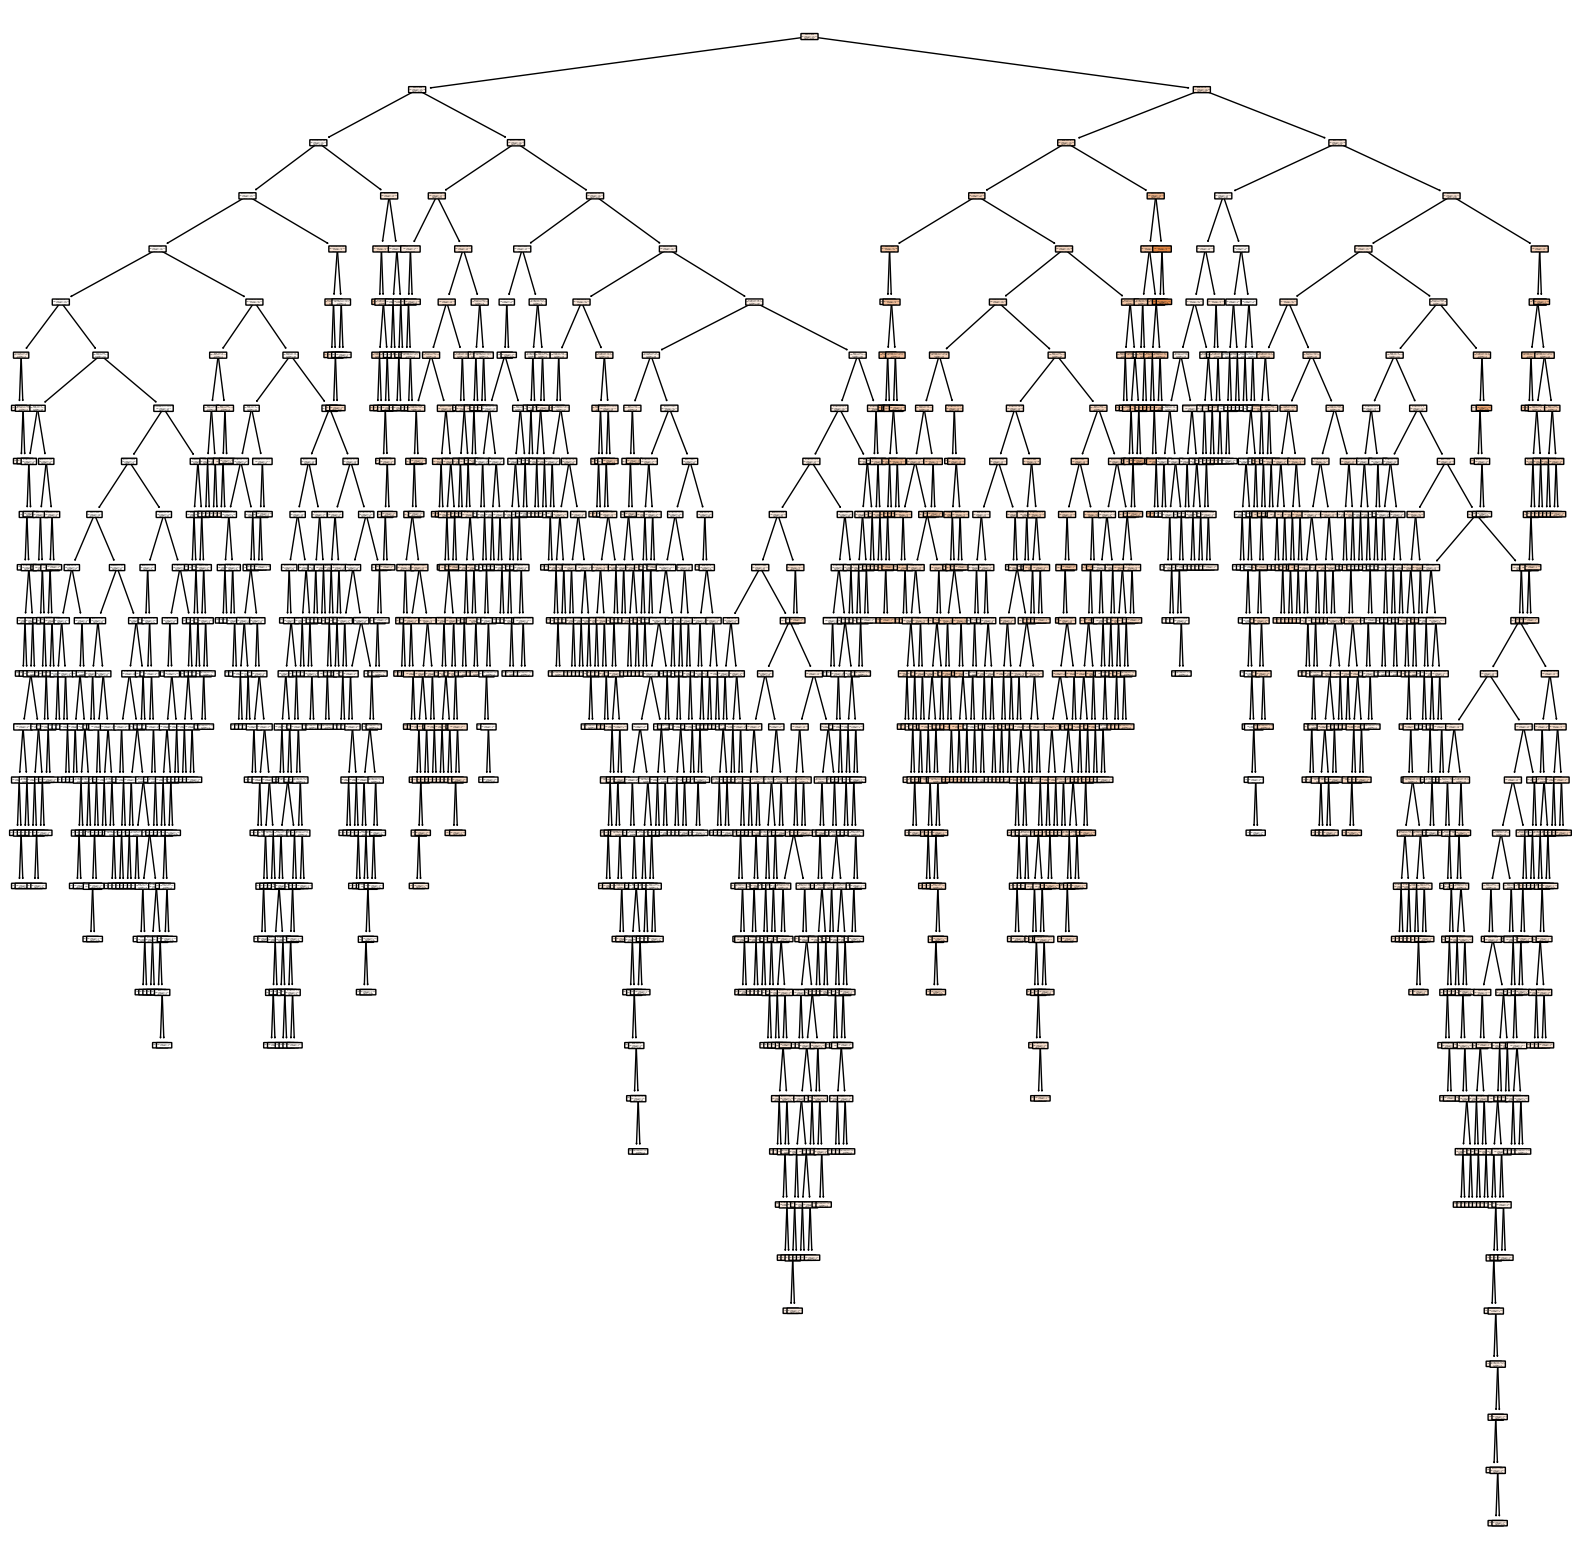

In [45]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(de,filled=True,rounded =True,feature_names =x.columns)
plt.savefig('tree.png',dpi=1200)

In [46]:
de_mse = mean_squared_error (ytest, de_pred)
de_mse

0.004180675380497446

In [47]:
de_mae = mean_absolute_error(ytest, de_pred)
de_mae

0.03793070672407653

# KNN

In [48]:
knn = KNeighborsRegressor()

In [49]:
knn.fit(xtrain, ytrain)

KNeighborsRegressor()

In [50]:
knn_pred = knn.predict(xtest)
knn_pred

array([0.43382278, 0.14224473, 0.20536675, 0.13113924, 0.06501266,
       0.13414346, 0.09040844, 0.1689789 , 0.22024776, 0.16714262,
       0.18595781, 0.23858228, 0.08201316, 0.13778903, 0.21799156,
       0.34904641, 0.14464169, 0.18206684, 0.25940928, 0.28168776,
       0.24271696, 0.20111392, 0.22635949, 0.19836624, 0.10524219,
       0.08855932, 0.05316456, 0.10217722, 0.01657384, 0.27837941,
       0.08201316, 0.1375443 , 0.14463966, 0.23064979, 0.43382278,
       0.20020253, 0.10939747, 0.17966582, 0.18686684, 0.29091376,
       0.15544304, 0.20982245, 0.11806211, 0.06622211, 0.08752709,
       0.0852962 , 0.25620253, 0.04280101, 0.30338093, 0.0585654 ,
       0.16879764, 0.09022751, 0.149333  , 0.08052354, 0.21535865,
       0.28854346, 0.03590447, 0.05908996, 0.23149367, 0.11281924,
       0.1670211 , 0.28270042, 0.18597131, 0.14936709, 0.07648608,
       0.08654852, 0.147173  , 0.06404118, 0.08489451, 0.12347848,
       0.38364523, 0.14464169, 0.04013502, 0.06457046, 0.18727

In [51]:
knn_score = knn.score(xtest, ytest)
knn_score

0.6693672146096494

In [52]:
knn_mse =  mean_squared_error (ytest, knn_pred)
knn_mse

0.005176822605572813

In [53]:
knn_mae = mean_absolute_error(ytest, knn_pred)
knn_mae

0.04398667400476976

# Random Forest

In [54]:
rf = RandomForestRegressor()

In [55]:
rf.fit(xtrain, ytrain)

RandomForestRegressor()

In [56]:
rf_pred = rf.predict(xtest)
rf_pred

array([0.35616395, 0.1057119 , 0.15140127, 0.14053489, 0.07416503,
       0.18594832, 0.10386532, 0.14178019, 0.1933843 , 0.14910002,
       0.20991824, 0.21865654, 0.05834152, 0.12228098, 0.30794488,
       0.43373522, 0.14430407, 0.18718108, 0.1989733 , 0.30981725,
       0.22991566, 0.23299568, 0.22215895, 0.19096186, 0.09386962,
       0.03678843, 0.06609507, 0.16208213, 0.03097526, 0.42515823,
       0.05673075, 0.13715401, 0.14829804, 0.29654341, 0.33067722,
       0.26307293, 0.16863926, 0.15954992, 0.25095072, 0.32431737,
       0.27948332, 0.21241018, 0.15412219, 0.05796758, 0.081041  ,
       0.09452974, 0.28829728, 0.04608884, 0.29656592, 0.08051619,
       0.11782145, 0.175047  , 0.22961683, 0.03138419, 0.31985389,
       0.34564236, 0.04087045, 0.06367637, 0.22205786, 0.06246436,
       0.25311023, 0.27700083, 0.19044408, 0.12698258, 0.09840716,
       0.06423617, 0.11566258, 0.04756312, 0.04556318, 0.0871577 ,
       0.27498746, 0.14333374, 0.05331023, 0.06467732, 0.15235

In [57]:
rf_score = rf.score(xtest, ytest)
rf_score

0.8615032021407305

In [58]:
rf_mse =mean_squared_error(ytest, rf_pred)
rf_mse

0.002168488382393307

In [59]:
rf_mae = mean_absolute_error(ytest, rf_pred)
rf_mae

0.02900130935788001

# Compare

In [60]:
Score_compare = pd.DataFrame({'Actual': ytest, 'Linear Regression': lin_score, 'Decision Tree': de_score, 'Random Forest': rf_score, 'KNN': knn_score})
Score_compare

,Actual,Linear Regression,Decision Tree,Random Forest,KNN
494,0.184810,0.449328,0.732989,0.861503,0.669367
1275,0.093671,0.449328,0.732989,0.861503,0.669367
715,0.115286,0.449328,0.732989,0.861503,0.669367
772,0.142785,0.449328,0.732989,0.861503,0.669367
1206,0.068354,0.449328,0.732989,0.861503,0.669367
...,...,...,...,...,...
496,0.122346,0.449328,0.732989,0.861503,0.669367
376,0.063966,0.449328,0.732989,0.861503,0.669367
882,0.029367,0.449328,0.732989,0.861503,0.669367
255,0.130802,0.449328,0.732989,0.861503,0.669367


In [61]:
Pred_compare = pd.DataFrame({'Actual': ytest, 'Linear Regression': lin_pred, 'Decision Tree': de_pred, 'Random Forest': rf_pred, 'KNN': knn_pred})
Pred_compare

,Actual,Linear Regression,Decision Tree,Random Forest,KNN
494,0.184810,0.258327,0.443038,0.356164,0.433823
1275,0.093671,0.126989,0.093671,0.105712,0.142245
715,0.115286,0.168849,0.200844,0.151401,0.205367
772,0.142785,0.133724,0.157131,0.140535,0.131139
1206,0.068354,0.120991,0.071392,0.074165,0.065013
...,...,...,...,...,...
496,0.122346,0.196919,0.122363,0.123112,0.118953
376,0.063966,0.060997,0.032911,0.046748,0.142815
882,0.029367,0.081368,0.018903,0.021526,0.037491
255,0.130802,0.154806,0.097215,0.176191,0.167558


In [62]:
compare_score = pd.DataFrame({'Model': ['Linear Regression', 'Dession Tree', 'KNN', 'Random Forest'], 'Accuracy': [lin_score,de_score,knn_score,rf_score]})

In [63]:
compare_score

,Model,Accuracy
0,Linear Regression,0.449328
1,Dession Tree,0.732989
2,KNN,0.669367
3,Random Forest,0.861503


In [64]:
data1 = pd.DataFrame({
    'Name':['Accuracy'],
    'Linear Regression': [lin_score],
    'DT': [de_score],
    'KNN':[knn_score],
    'Random forest': [rf_score]})
data1.head()

,Name,Linear Regression,DT,KNN,Random forest
0,Accuracy,0.449328,0.732989,0.669367,0.861503


<Axes: xlabel='Name'>

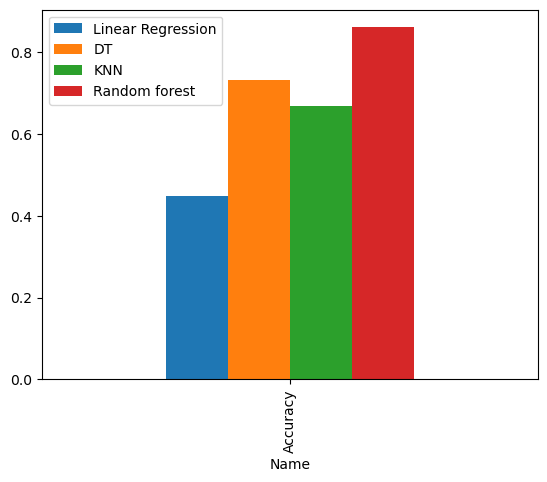

In [65]:
data1.plot(x="Name", y=["Linear Regression", "DT","KNN","Random forest"], kind="bar")

In [66]:
df = pd.DataFrame({
    'Name':['Linear Regression', 'Dession Tree','KNN','Random Forest'],
    'Accuracy Score':[lin_score,de_score, knn_score,rf_score],
    'Mean Absolute Error': [lin_mae,de_mae, knn_mae,rf_mae],
    'Mean Squared Error':[lin_mse,de_mse, knn_mse,rf_mse]})
df.head()

,Name,Accuracy Score,Mean Absolute Error,Mean Squared Error
0,Linear Regression,0.449328,0.065054,0.008622
1,Dession Tree,0.732989,0.037931,0.004181
2,KNN,0.669367,0.043987,0.005177
3,Random Forest,0.861503,0.029001,0.002168


<Axes: xlabel='Name'>

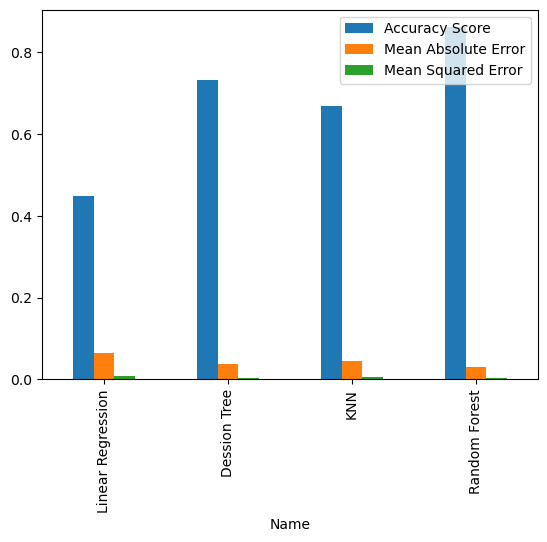

In [67]:
df.plot(x="Name", y=["Accuracy Score","Mean Absolute Error","Mean Squared Error"], kind="bar")

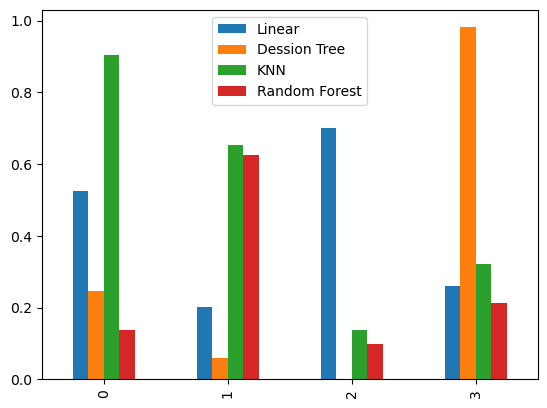

In [68]:
df = pd.DataFrame(data = np.random.random(size=(4,4)), columns = ['Linear','Dession Tree','KNN','Random Forest'])

df.plot(kind='bar')
plt.show()

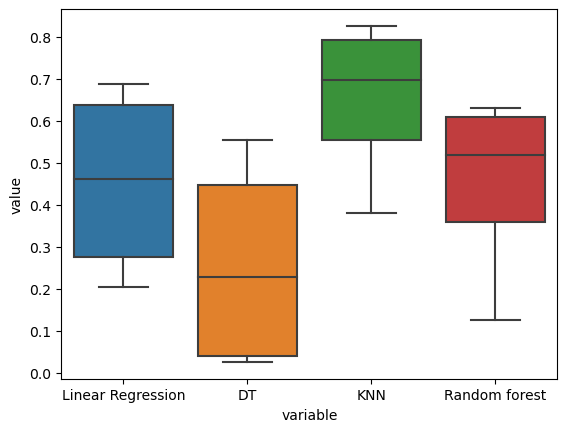

In [69]:
df = pd.DataFrame(data = np.random.random(size=(4,4)), columns = ['Linear Regression','DT','KNN','Random forest'])

sns.boxplot(x="variable", y="value", data=pd.melt(df))

plt.show()